**Notebook enthält**
+ Anzahl der Artists und Songs, dazugehörige Verteilungen
+ Wordclouds
+ Worthäufigkeitsverteilungen nach Artist/ Genre

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

### Dataexploration

In [2]:
songs = pd.read_csv("../songs_25.csv")
songs

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,stemmed_text
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...,sometim when i 'm mad there 's a part of me t...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...,tri to sneak out without say with my loudest ...
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...,you feel bad let me tell you we all get the b...
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...,down in the street they 're all sing and shou...
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...,just a notion that 's all just a feel that yo...
...,...,...,...,...,...,...,...,...,...,...
6795,6795,ZZ Top,36-22-36,what what what you want? hey my thing is a ...,646,Rock,Pop,True,real fine real fine round thing thing thing th...,what what what you want ? hey my thing is a r...
6796,6796,ZZ Top,Deal Goin' Down,when the deal goin' down and you gonna take yo...,746,Rock,Pop,True,deal chance mystery trance future deal deal no...,when the deal goin ' down and you gon na take...
6797,6797,ZZ Top,Can't Stop Rockin',i heard about the rock for sometime i know. ...,995,Rock,Pop,True,easy wrong right low loose high rock roll rock...,i heard about the rock for sometim i know . i...
6798,6798,ZZ Top,I Got The Message,i'm picking up on a signal that's in the air ...,495,Rock,Pop,True,straight electric about empty straight straigh...,i 'm pick up on a signal that 's in the air t...


#### explore data

In [5]:
artists = np.unique(songs.artists)
print(len(np.unique(songs.artists)))
len(songs)

272


6800

In [6]:
mean ={}
for a in artists:
    mean[a] = int(np.mean(songs.number_of_tokens[songs.artists==a]))

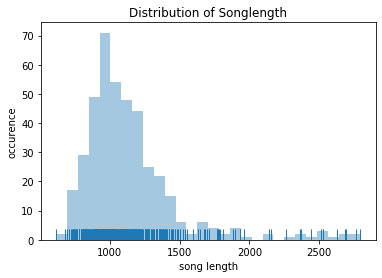

In [13]:
ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Distribution of Songlength")
plt.savefig("songlength_dist")
plt.show()

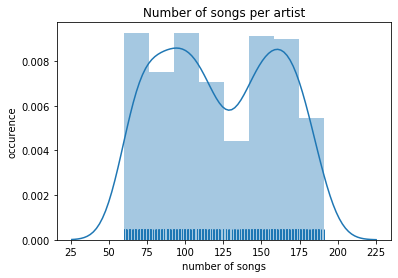

In [14]:
ax = sns.distplot(list(c.values()), rug=True)
ax.set_xlabel("number of songs")
ax.set_ylabel("occurence")
ax.set_title("Number of songs per artist")
plt.savefig("songnumber_per_artist")
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features=2000, min_df=10, max_df=300, stop_words='english')
cv.fit(songs['stemmed_text'])

results = cv.transform(songs['stemmed_text'])

features = cv.get_feature_names()

In [29]:
df_res = pd.DataFrame(results.toarray(), columns=features)
df_res = df_res.set_index(songs.Genre1)

In [30]:
df_res.loc['sum']=df_res.sum()
df_res = df_res.div(df_res.sum(axis=1), axis=0)

In [31]:
df_res.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
df_res

,la,ooh,ah,christma,em,music,alright,fuck,goodby,moment,...,louisiana,wink,sore,motor,social,dan,nighttim,opportun,concret,urg
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.382979,0.085106,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
df_res.to_csv('word_frequencies_bygenreandpos.csv')

In [92]:
df_res = pd.read_csv("word_frequencies_bygenreandpos.csv")

In [93]:
df_res = df_res.set_index(df_res.Genre1)
df_res

,Genre1,music,dead,black,body,ready,hot,round,rock,easy,...,airport,aisle,cottage,poverty,glue,ambition,bull,screamin,restaurant,lone
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.030303,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.034483,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.058824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.076923,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [94]:
df_res = df_res.drop("Genre1", axis=1)
df_res

,music,dead,black,body,ready,hot,round,rock,easy,feeling,...,airport,aisle,cottage,poverty,glue,ambition,bull,screamin,restaurant,lone
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.030303,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.034483,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.076923,0.076923,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
songs[songs.Genre1=="Hip Hop"]
np.unique(songs.Genre1)

array(['Electronic', 'Folk, World, & Country', 'Funk / Soul', 'Hip Hop',
       'Jazz', 'Pop', 'Reggae', 'Rock'], dtype=object)

In [57]:
abba = df_res[df_res.index=="Funk / Soul"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
abba.head(2)

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ooh,honey,jesu,joy,lover,darl,sad,music,anyon,babe,...,deceiv,ding,cadillac,pair,beam,press,whip,divin,hood,urg
Genre1,,,,,,,,,,,,,,,,,,,,,
Funk / Soul,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Funk / Soul,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


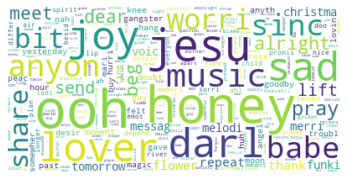

In [58]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = abba.loc['sum']
# text = abba.any()
makeImage(text, "wordcloud_pos_funksoul")

In [36]:
# np.unique(songs.artist)

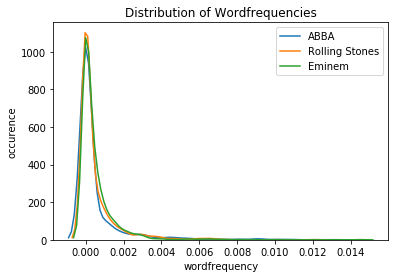

In [26]:
ax = sns.distplot(abba.loc['sum'], hist=False, label="ABBA")
ax = sns.distplot(stones.loc['sum'], hist=False, label="Rolling Stones")
ax = sns.distplot(eminem.loc['sum'], hist=False, label="Eminem")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

In [37]:
# mfw = pd.read_csv("word_frequencies_bygenre.csv")
mfw = df_res.copy()
mfw = mfw.iloc[:,:31]
mfw.dropna()
# mfw = mfw.set_index(mfw.Genre1)
# mfw = mfw.drop("Genre1", axis=1)
mfw

,la,ooh,ah,christma,em,music,alright,fuck,goodby,moment,...,river,uh,lover,whoa,ladi,blow,jesu,truth,moon,mother
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.382979,0.085106,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.055556,0.000000,0.000000,0.000000,0.000000


In [38]:
abba = mfw[mfw.index=="Pop"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
# abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
stones = mfw[mfw.index=="Jazz"]
stones.loc['sum']=stones.sum()
stones = stones.div(stones.sum(axis=1), axis=0)
# stones.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

In [40]:
eminem = mfw[mfw.index=="Hip Hop"]
eminem.loc['sum']=eminem.sum()
eminem = eminem.div(eminem.sum(axis=1), axis=0)
# eminem.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

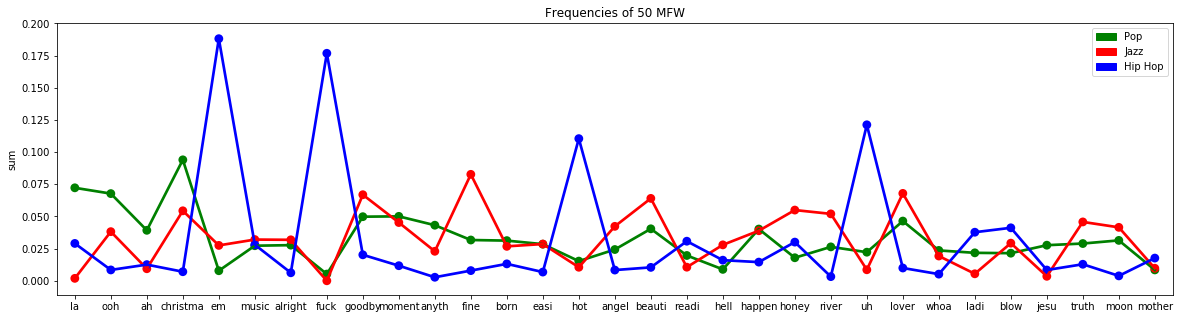

In [42]:
import matplotlib.patches as mpatches
green = mpatches.Patch(color='g', label='Pop')
red = mpatches.Patch(color='r', label='Jazz')
blue = mpatches.Patch(color='b', label='Hip Hop')


fig, ax = plt.subplots(figsize=(20,5))
ax = sns.pointplot(x=abba.columns, y=abba.loc['sum'],color='g')
ax = sns.pointplot(x=stones.columns, y=stones.loc['sum'], color='r')
ax = sns.pointplot(x=eminem.columns, y=eminem.loc['sum'], color='b')
plt.title("Frequencies of 50 MFW")
plt.legend(handles=[green, red, blue])
plt.savefig("freq_30mfw_genre")

### number of songs per genre

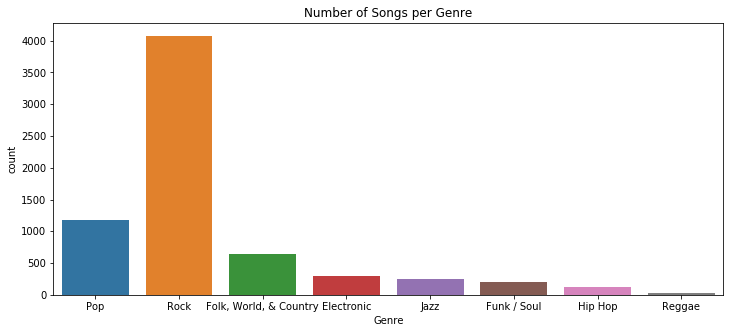

In [148]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = songs.Genre1)
ax.set_xlabel("Genre")
plt.title("Number of Songs per Genre")
plt.savefig("songs_per_genre")

### songlength per genre

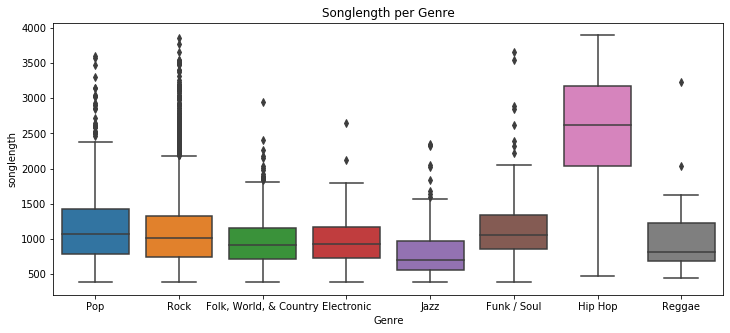

In [152]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=songs.Genre1, y=songs.number_of_tokens)
ax.set_ylabel("songlength")
ax.set_xlabel("Genre")
plt.title("Songlength per Genre")
plt.savefig("songlength_per_genre")

#### sample data

In [15]:
songs_sample = songs.copy()
songs_sample = songs_sample.sample(frac=.25, replace=False, random_state=42)
songs_sample

,artist,song,text,number_of_tokens
20468,Van Halen,Take Your Whiskey Home,"[well, my, baby, she, don't, want, me, around....",224
41605,Lil Wayne,Army Gunz,"[yeah, yeah, yeah, (i, got, army, gunz), yeah,...",578
52292,Stevie Wonder,Isn't She Lovely,"[isn't, she, lovely, isn't, she, wonderful, is...",108
42697,Mariah Carey,O Holy Night,"[o, holy, night, the, stars, are, brightly, sh...",78
27993,Clash,I'm So Bored With The U.S.A.,"[yankee, soldier, he, want, to, shoot, some, s...",113
...,...,...,...,...
25325,Billie Holiday,My Last Affair,"[can't, you, see, what, love, and, romance, ha...",97
28783,Dave Matthews Band,The Space Between,"[you, cannot, quit, me, so, quickly, is, no, h...",310
18645,Squeeze,Crying In My Sleep,"[breaking, up, is, breaking, my, heart, is, sh...",178
32684,Foo Fighters,Dear Lover,"[dear, lover, do, you, remember?, the, sound, ...",134


In [16]:
songs_sample.to_csv("sample_25percent.csv")